In [3]:
import numpy as np
import matplotlib.pyplot as plt
from len import infinite_len_ab, finite_len_ab,\
      bool_conv, inv_bool_conv
infapprox =infinite_len_ab()

Initialised the infinite length class


In [4]:
p = 0
n0 = 128
NPTS = 200
q_min = 1/4
ALPHA = 0.5
q = np.linspace(q_min+0.01, 0.5, NPTS)
r = np.linspace(0.01, 0.499, NPTS)
s_min = np.zeros((NPTS, NPTS))
l_min = np.zeros((NPTS, NPTS))
s = np.linspace(0, 0.5, NPTS)
D = (1 - (2*q) )

In [5]:
for i, rr in enumerate(r):
    for j , qq in enumerate(q):
        sm = min(1-(1-2*qq)/ALPHA, 2*rr)
        assert np.isscalar(sm)
        s  = np.linspace(0, sm, num = NPTS )
        l_s = infapprox.len(q = qq, n0 = n0, p = p,
                            r= rr, s = s, alpha=ALPHA)
        
        minind = np.argmin( l_s )
        assert np.isscalar(minind)
        s_min[i, j] = s[minind]
        l_min[i, j] = l_s[minind]



In [6]:
Q, R  = np.meshgrid(q ,r)
mask = l_min <=0

#### Finding $\alpha_{min}$

In [ ]:
#
for i, rr in enumerate(r):
    for j , qq in enumerate(q):
        
        alpha = np.linspace(1-2*q, 0.5, NPTS)
        lm = np.zeros_like(alpha)
        for k,ALPHA in enumerate(alpha):
            sm = min(1-(1-2*qq)/ALPHA, 2*rr)
            assert np.isscalar(sm)
            s  = np.linspace(0, sm, num = NPTS )
            l_s = fapprox.len(q = qq, n0 = n0, p = p,
                                r= rr, s = s, alpha=ALPHA)
            assert l_s.shape == s.shape
            
            assert np.isscalar(minind)
            lm[k] = np.min(l_s)
        minind = np.argin(lm)

            # s_min[i, j] = s[minind]
            # l_min[i, j] = l_s[minind]


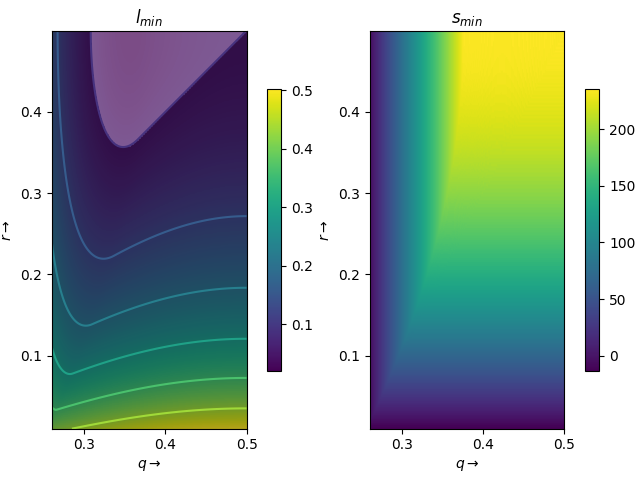

In [7]:
%matplotlib widget
plt.clf()
fig, axs = plt.subplots(1, 2 , constrained_layout = True)
map = axs[1].imshow(s_min, origin = 'lower', extent=[q[0], q[-1], r[0], r[-1]], aspect='equal')
axs[1].set_title(r'$s_{min}$')
plt.colorbar(mappable= map, ax = axs[0],  shrink = 0.7)
map = axs[0].imshow(l_min, origin = 'lower', extent=[q[0], q[-1], r[0], r[-1]], aspect='equal')
plt.colorbar(mappable= map, ax = axs[1], shrink = 0.7)
axs[0].imshow(mask, cmap = 'grey', origin = 'lower', extent=[q[0], q[-1], r[0], r[-1]], aspect = 'equal', alpha = 0.3)

axs[0].contour(Q,R, l_min)
axs[0].set_title(r'$l_{min}$')
axs[0].set_xlabel(r'$q\to$')
axs[0].set_ylabel(r'$r\to$')

axs[1].set_xlabel(r'$q\to$')
axs[1].set_ylabel(r'$r\to$')
plt.show()

# Finite Length Approximation
    

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from len import infinite_len_ab, finite_len_ab,\
      bool_conv, inv_bool_conv
fapprox =finite_len_ab()
p = 0
n0 = 100
NPTS =100
q_min = 1/4
ALPHA = 0.5
q = np.linspace(q_min+0.01, 0.5, NPTS)
r = np.linspace(0.01, 0.499, NPTS)
s_min = np.zeros((NPTS, NPTS))
l_min = np.zeros((NPTS, NPTS))
s = np.linspace(0, 0.5, NPTS)
D = (1 - (2*q) )

for i, rr in enumerate(r):
    for j , qq in enumerate(q):
        sm = min(1-(1-2*qq)/ALPHA, 2*rr)
        assert np.isscalar(sm)
        s  = np.linspace(0, sm, num = NPTS )
        l_s = fapprox.len(q = qq, n0 = n0, p = p,
                            r= rr, s = s, alpha=ALPHA)
        assert l_s.shape == s.shape
        
        minind = np.argmin( l_s )
        assert np.isscalar(minind)
        s_min[i, j] = s[minind]
        l_min[i, j] = l_s[minind]


Q, R  = np.meshgrid(q ,r)
mask = l_min ==0

Initialised the finite length class


Text(0, 0.5, '$r\\to$')

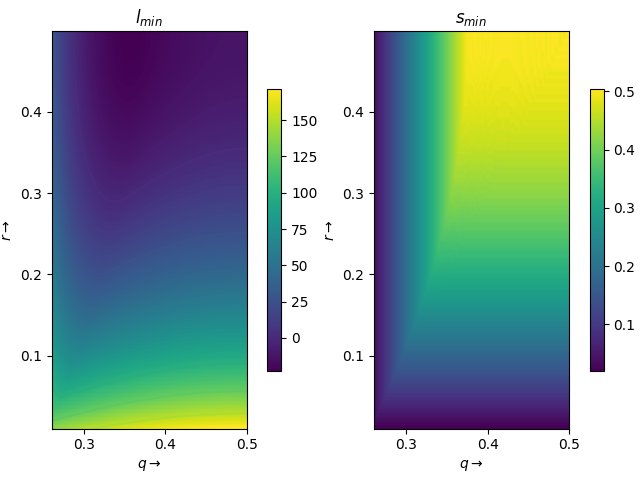

In [ ]:
%matplotlib widget
plt.clf()
fig, axs = plt.subplots(1, 2 , constrained_layout = True)
map = axs[1].imshow(s_min, origin = 'lower', extent=[q[0], q[-1], r[0], r[-1]], aspect='equal')
axs[1].set_title(r'$s_{min}$')
plt.colorbar(mappable= map, ax = axs[1],  shrink = 0.7)
map = axs[0].imshow(l_min, origin = 'lower', extent=[q[0], q[-1], r[0], r[-1]], aspect='equal')
plt.colorbar(mappable= map, ax = axs[0], shrink = 0.7)
# axs[0].imshow(mask, cmap = 'grey', origin = 'lower', extent=[q[0], q[-1], r[0], r[-1]], aspect = 'equal', alpha = 0.5)

axs[0].contour(Q,R, l_min)
axs[0].set_title(r'$l_{min}$')
axs[0].set_xlabel(r'$q\to$')
axs[0].set_ylabel(r'$r\to$')

axs[1].set_xlabel(r'$q\to$')
axs[1].set_ylabel(r'$r\to$')